In [87]:
import pandas as pd
df = pd.read_csv('circle.csv')

In [88]:
df

,Unnamed: 0,feature1,feature2,label_y
0,0,8.660254,-5.00000,0
1,1,8.717792,-4.89899,0
2,2,8.773790,-4.79798,0
3,3,8.828277,-4.69697,0
4,4,8.881281,-4.59596,0
...,...,...,...,...
395,395,-1.969049,-4.59596,1
396,396,-1.714198,-4.69697,1
397,397,-1.406908,-4.79798,1
398,398,-0.999949,-4.89899,1


In [89]:
df = df.drop('Unnamed: 0', axis=1)

In [90]:
df.head()

,feature1,feature2,label_y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


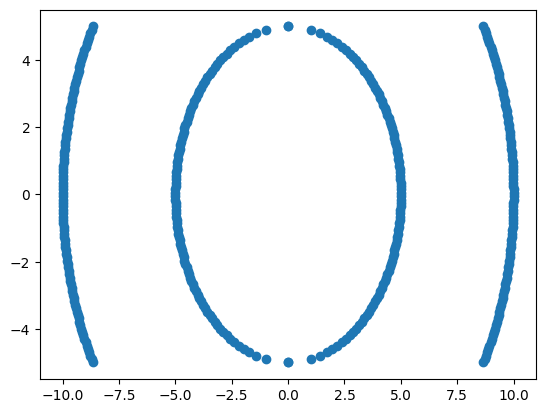

In [91]:
from matplotlib import pyplot as plt
plt.scatter(df.feature1 , df.feature2)

In [92]:
df.label_y.value_counts()

0    200
1    200
Name: label_y, dtype: int64

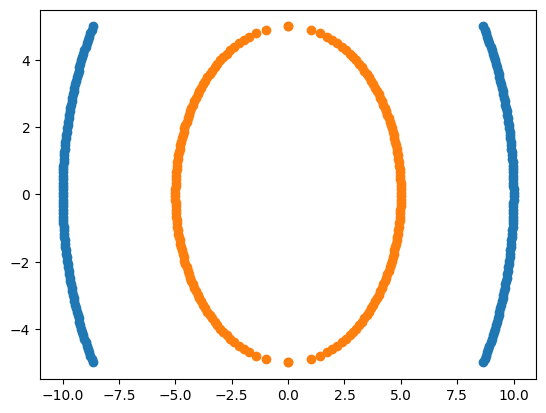

In [93]:
#separating into 2 different classes (df1 -> for 0 and df2 -> for 1)

df1 = df[df.label_y == 0]
df2 = df[df.label_y == 1]

plt.scatter(df1.feature1 , df1.feature2)
plt.scatter(df2.feature1 , df2.feature2)

plt.show()

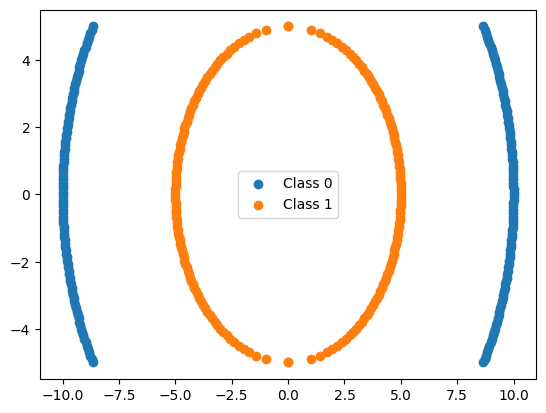

In [94]:
df1 = df[df.label_y == 0]
df2 = df[df.label_y == 1]

plt.scatter(df1.feature1 , df1.feature2, label = 'Class 0')
plt.scatter(df2.feature1 , df2.feature2, label = 'Class 1')

plt.legend() #used to add a legend to a plot, allowing you to label different elements of the plot with their corresponding descriptions.
plt.show()

#Linearly inseparable

In [95]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.30)

#30% data for testing and 70% data for training.

In [96]:
train.head()

,feature1,feature2,label_y
54,9.989664,0.454545,0
55,9.984556,0.555556,0
289,3.013421,3.989899,1
98,8.717792,4.898990,0
212,3.263736,-3.787879,1


In [97]:
test.head()

,feature1,feature2,label_y
259,4.907054,0.959596,1
191,-9.078976,-4.191919,0
76,9.635088,2.676768,0
105,-8.932829,4.494949,0
124,-9.662581,2.575758,0


In [98]:
from sklearn.svm import SVC #CLASSIFICATION
from sklearn.svm import SVR # REGRESSION

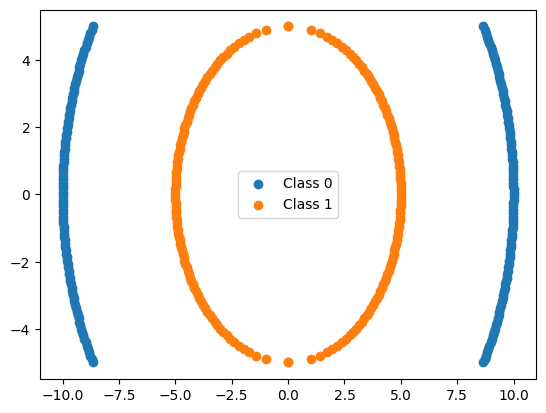

In [99]:
df1 = df[df.label_y == 0]
df2 = df[df.label_y == 1]

plt.scatter(df1.feature1 , df1.feature2, label = 'Class 0')
plt.scatter(df2.feature1 , df2.feature2, label = 'Class 1')

plt.legend()
plt.show()

#as it is linearly inseparable, then to make it linearly separable, we applied linear kernel.

**Linear**

In [100]:
svm1 = SVC(kernel = 'linear')

In [101]:
svm1.fit(df.drop('label_y', axis=1), df.label_y)

#in svm1, we cropped label y from the full data and took the features. here, df.label_y is the class.

SVC(kernel='linear')

In [102]:
svm1.score(test.drop('label_y', axis=1), test.label_y) #testing

#generating score on the full testing and training data.

#linearly inseparable

0.4666666666666667

In [103]:
svm1.score(df.drop('label_y', axis=1), df.label_y) # total data

#df.drop('label_y') -> value of x
#df.label_y -> value of y

#performance of full training data -> 0.5

0.5

In [104]:
f1 = df['feature1']
f2 = df['feature2']
f1_square = df['feature1']**2
f2_square = df['feature2']**2
f1f2 = df['feature1']*df['feature2']

In [105]:
df['f1_square'] = df['feature1']**2 #creating a column in this name
df['f2_square'] = df['feature2']**2
df['f1f2']= df['feature1']*df['feature2']

In [106]:
df.head()

,feature1,feature2,label_y,f1_square,f2_square,f1f2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [107]:
x = df.drop('label_y', axis=1)
y = df['label_y']

In [108]:
x.head()

,feature1,feature2,f1_square,f2_square,f1f2
0,8.660254,-5.00000,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,78.877155,21.122845,-40.818009


In [109]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label_y, dtype: int64

In [110]:
import plotly.express as px #provides a high-level interface for creating a variety of interactive visualizations, including scatter plots, line charts, bar charts, histograms, and more. It aims to make it easy to create complex visualizations with minimal code.
px.scatter_3d(df, x='f1_square', y = 'f2_square', z='f1f2', color='label_y')

#linearly separable

# here, 3 new features increased.

# yellow -> label 1 and blue -> label 0.

#now, it is in higher dimension (3D space). So, it is linearly separable.

In [111]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30)

In [112]:
svm2 = SVC(kernel = 'linear')

In [113]:
svm2.fit(xtrain, ytrain)

SVC(kernel='linear')

In [114]:
svm2.fit(xtrain, ytrain)

SVC(kernel='linear')

In [115]:
svm2.score(xtest, ytest) #Performance is 100% or 1.0.

# when it was linearly inseparable (2D), score was 0.483 (48.3%).
#but when it is linearly separable (3D), then score is 1.0 (100%).

1.0

**RBF**

In [116]:
#similarly, if we use rbf kernel (radial basis function) now, then ->

svm3 = SVC(kernel = 'rbf')
svm3.fit(train.drop('label_y', axis=1), train.label_y) #updating df with the 5 features.

#by default, it works with rbf kernel as it can deal with most of the data.

SVC()

In [117]:
svm3.score(train.drop('label_y', axis=1), train.label_y) #testing

1.0

In [118]:
train.head()

,feature1,feature2,label_y
54,9.989664,0.454545,0
55,9.984556,0.555556,0
289,3.013421,3.989899,1
98,8.717792,4.898990,0
212,3.263736,-3.787879,1


**Hyper Parameter Optimization**

For **Linear Kernel**

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid to search (for linear kernel)
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear'],        # Only linear kernel
}

# Create an SVM classifier
svm = SVC()

# Create a GridSearchCV object with the SVM classifier and parameter grid
grid_search = GridSearchCV(svm, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to the training data
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Hyperparameters: {'C': 0.1, 'kernel': 'linear'}
Best Score: 1.0


For **RBF Kernel**

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid to search (for RBF kernel)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

# Create an SVM classifier with RBF kernel
svm_rbf = SVC(kernel='rbf')

# Create a GridSearchCV object with the SVM classifier and parameter grid
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

#After fitting the grid search to the training data, you can access the best hyperparameters using grid_search.best_params_ and the corresponding best score using grid_search.best_score_.

# Evaluate the optimized model on the test set
best_svm_rbf = grid_search.best_estimator_
test_score = best_svm_rbf.score(xtest, ytest)
print("Test Score:", test_score)


Best Hyperparameters: {'C': 1, 'gamma': 0.1}
Best Score: 0.9928571428571429
Test Score: 0.9916666666666667


For **Linear Kernel & RBF Kernel**

In [121]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for RBF kernel
}

# Create an SVM classifier
svm = SVC()

# Create a GridSearchCV object with the SVM classifier and parameter grid
grid_search = GridSearchCV(svm, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to the training data
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

#GridSearchCV is used to search through different combinations of hyperparameters (C, kernel, and gamma) for the SVM classifier.
#The cv parameter specifies the number of cross-validation folds.

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 1.0


**Out of SVM (Extra)**

Data Generation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [122]:
from sklearn.datasets import make_classification

In [123]:
x,y = make_classification(n_samples=100000,n_features=500,n_classes=2 )

#by make_classification, new data can be generated.
#here, samples = 100, features=20 (deafult). It can be customized as well. To check the parameters, press Shift + Tab.
#n_clusters_per_class -> how many categories are there in each class?
#n_classes -> how many classes will be there?

In [124]:
len(x)

100000

In [125]:
x

array([[-0.69910226,  1.38492365,  0.9548638 , ..., -0.85589473,
         0.08420393,  0.56521425],
       [ 0.66134924,  0.34526896, -0.60387126, ...,  1.39345925,
        -0.36990568, -0.45212341],
       [ 0.37508081, -0.99956721, -1.3446495 , ...,  1.37349473,
         0.16199957,  1.61483787],
       ...,
       [-0.37562595,  1.222502  , -0.74851526, ..., -0.88618614,
         1.17933936,  0.36626773],
       [ 0.63504292,  0.75957618, -0.29786321, ..., -0.94807786,
         2.50137347,  0.8402794 ],
       [ 1.46079955, -0.34964559, -1.02367605, ...,  1.33992708,
        -1.22809686, -2.88658784]])

In [126]:
pd.DataFrame(x)  #converting x into a dataframe.
#here, 1 lakh sample and 500 features.

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-0.699102,1.384924,0.954864,0.253919,-1.439631,-1.059668,-0.694437,-1.277841,0.208021,-0.074707,...,0.099868,1.009199,0.499452,2.033876,0.005815,-1.635236,-0.560045,-0.855895,0.084204,0.565214
1,0.661349,0.345269,-0.603871,0.811672,-1.475818,0.736690,-0.737705,-1.711932,0.638946,1.013977,...,-0.692796,0.069749,0.095689,-0.877220,-0.373030,-0.404035,-0.760386,1.393459,-0.369906,-0.452123
2,0.375081,-0.999567,-1.344649,-0.186363,-0.415427,-0.669775,0.287141,0.439839,-0.397172,0.954037,...,1.363042,-0.834818,1.553364,-0.849387,0.434584,1.349679,0.937070,1.373495,0.162000,1.614838
3,2.178641,-0.395501,-0.618696,-0.166263,0.337210,1.934965,0.562213,0.120189,-0.936612,-0.361991,...,-0.667310,-0.360305,0.348843,-1.860022,0.676706,2.348935,1.916239,-0.364118,0.249926,0.869018
4,1.580903,2.107537,-0.955156,-0.223705,-0.315035,-0.325152,1.488599,-0.300029,-0.552801,-2.202870,...,-1.881610,1.996503,-1.050940,0.793548,1.938543,0.857347,1.360552,0.451068,-1.271731,-0.400680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.730654,-1.634555,-0.787077,-0.599394,1.614098,0.418262,0.191329,0.882450,1.757814,-0.009344,...,1.108068,0.742468,0.281552,-0.419563,-0.324842,-0.148188,-1.671480,-0.396205,-0.212683,-0.038066
99996,2.045941,-1.029964,0.075497,-0.462018,-0.064414,-0.474725,-2.444609,-0.321200,0.201982,-0.193351,...,0.948174,1.633223,1.454160,-0.530727,0.050773,-0.197234,0.744532,-0.974895,-2.021213,-0.177673
99997,-0.375626,1.222502,-0.748515,-0.083425,0.440260,1.484883,1.098639,-0.136122,-0.657352,1.088366,...,0.561448,0.718950,0.787526,-0.169350,-1.890063,-0.629139,-0.309688,-0.886186,1.179339,0.366268
99998,0.635043,0.759576,-0.297863,1.132635,-0.209658,0.070468,0.704897,-0.190994,0.793001,0.395340,...,1.881287,1.069914,-1.633719,-0.073565,-0.970398,-0.023171,-0.864967,-0.948078,2.501373,0.840279


In [127]:
from sklearn.datasets import make_regression

In [128]:
x,y = make_regression(n_samples=100000,n_features=500 )  #generating data for make_regression.
#here, we don't have any no. of class.

In [129]:
pd.DataFrame(y) ##converting y into a dataframe.
#here, 1 lakh sample and 500 features.

,0
0,-26.672298
1,70.419933
2,37.793721
3,-124.486930
4,-61.428646
...,...
99995,-103.409278
99996,-151.440514
99997,-187.542086
99998,-327.061209


In [130]:
y #value of class

array([ -26.67229811,   70.41993322,   37.79372071, ..., -187.54208576,
       -327.06120936,   -9.51631594])